In [79]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read data
cr_loan = pd.read_csv('cr_loan2.csv')

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
cr_loan.head(5)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


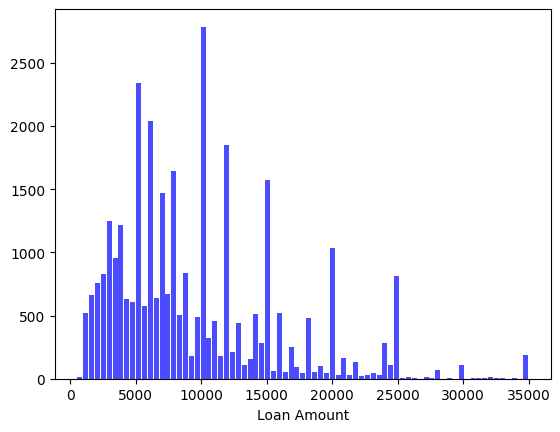

In [80]:
# Looking at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


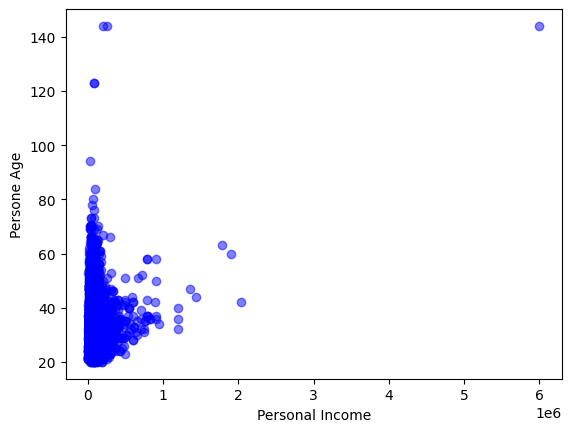

In [81]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plotting a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [82]:
# Creating a cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [83]:
# Creating a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [84]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


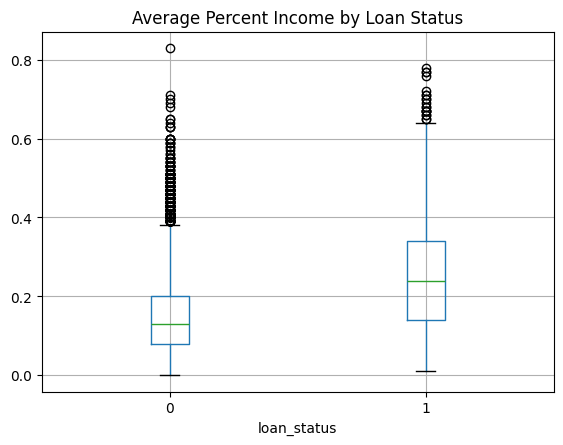

In [85]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [86]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [87]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


Generally with credit data, key columns like person_emp_length are of high quality, but there is always room for error. With this in mind, we build our intuition for detecting outliers!

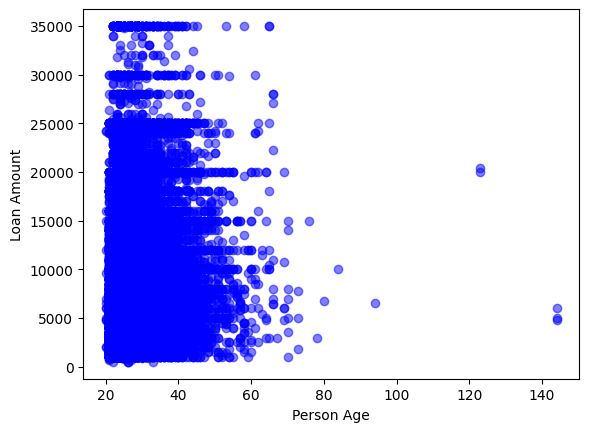

In [88]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

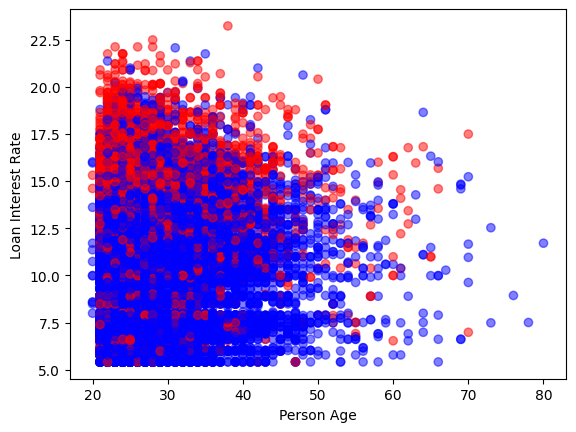

In [89]:
import matplotlib

# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 80].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_30917/3724786635.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)


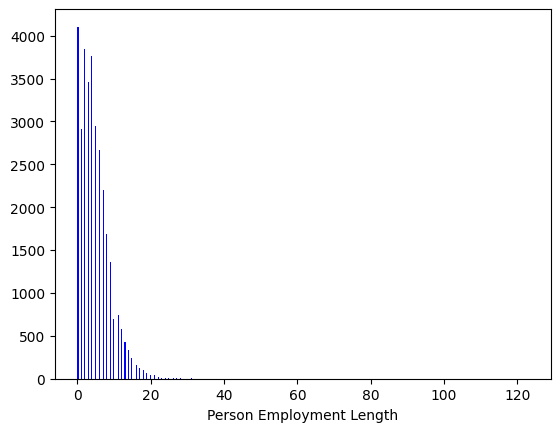

In [90]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# # Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# # Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

We can use several different functions like mean() and median() to replace missing data. The goal here is to keep as much of our data as we can! It's also important to check the distribution of that feature to see if it changed.

In [91]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


In [92]:
cr_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29465 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29465 non-null  int64  
 1   person_income               29465 non-null  int64  
 2   person_home_ownership       29465 non-null  object 
 3   person_emp_length           29465 non-null  float64
 4   loan_intent                 29465 non-null  object 
 5   loan_grade                  29465 non-null  object 
 6   loan_amnt                   29465 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 29465 non-null  int64  
 9   loan_percent_income         29465 non-null  float64
 10  cb_person_default_on_file   29465 non-null  object 
 11  cb_person_cred_hist_length  29465 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.

In [93]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [94]:
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


Trying Xgboost model

In [95]:
X = cr_loan_prep.drop('loan_status', axis=1)
y = cr_loan_prep['loan_status']

In [96]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [97]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [98]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
25231,29,81900,13.0,8000,7.66,0.10,10,True,False,False,...,True,True,False,False,False,False,False,False,True,False
25262,31,47700,2.0,12000,11.99,0.25,5,False,False,False,...,False,False,True,False,False,False,False,False,True,False
21498,35,48000,6.0,5000,13.48,0.10,10,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1774,24,19200,2.0,2000,13.49,0.10,4,False,False,False,...,False,False,False,True,False,False,False,False,True,False
11441,23,75000,7.0,10200,6.03,0.14,2,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [99]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.039079
1            0      0.000193
2            0      0.001017
3            0      0.070693
4            0      0.587638


The predictions don't look the same as with the LogisticRegression(), do they? Notice that this model is already accurately predicting the probability of default for some loans with a true value of 1 in loan_status

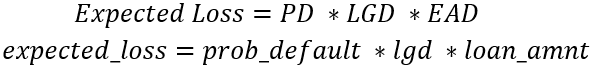

In [100]:
# Import the classification report method
from sklearn.metrics import classification_report

# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 1 0 1]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9194
     Default       0.95      0.74      0.83      2592

    accuracy                           0.93     11786
   macro avg       0.94      0.87      0.90     11786
weighted avg       0.94      0.93      0.93     11786



Have a look at the precision and recall scores! Remember the low default recall values we were getting from the LogisticRegression()? This model already appears to have serious potential.

In [101]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

In [102]:
y = cr_loan_prep[['loan_status']]

In [103]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [104]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_income': 1171.0, 'loan_int_rate': 1130.0, 'loan_percent_income': 697.0, 'loan_amnt': 600.0, 'person_home_ownership_MORTGAGE': 157.0, 'loan_grade_F': 23.0}


So, the importance for loan_grade_F is only 23 in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, they might affect the importance of other training columns.

In [105]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

In [106]:
# Create the training and testing sets X2` and `X3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.4, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=.4, random_state=123)

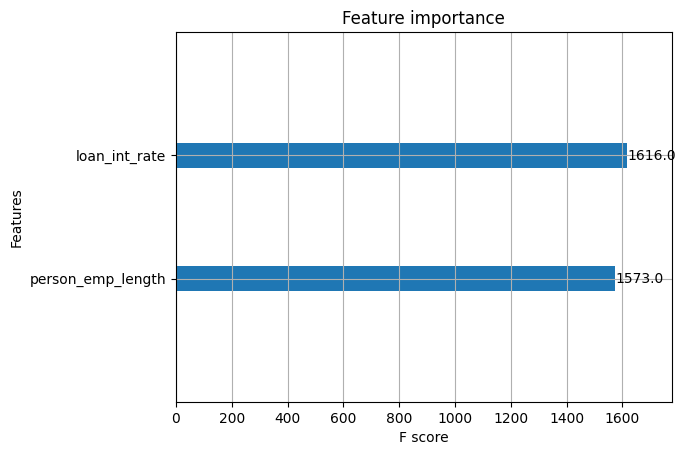

In [107]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

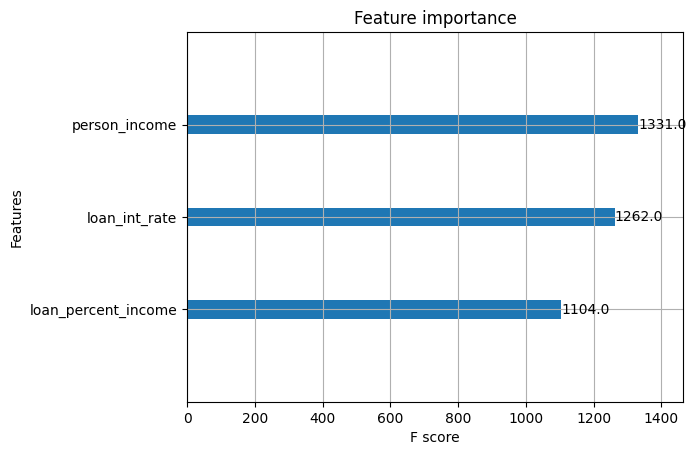

In [108]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

The importance of loan_int_rate went down. Initially, this was the most important column, but person_income ended up taking the top spot here.

In [109]:
# Predict the loan_status using each model
gbt_preds = clf_gbt.predict(X_test)
gbt2_preds = clf_gbt2.predict(X2_test)

# # Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# # Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.96      0.93      9194
     Default       0.82      0.64      0.72      2592

    accuracy                           0.89     11786
   macro avg       0.86      0.80      0.82     11786
weighted avg       0.89      0.89      0.88     11786

              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9194
     Default       0.69      0.26      0.38      2592

    accuracy                           0.81     11786
   macro avg       0.76      0.61      0.63     11786
weighted avg       0.79      0.81      0.78     11786



The first model has an accuracy of 0.89, meaning it correctly predicted the loan status 89% of the time. For the 'Non-Default' class, it has a precision of 0.90 and recall of 0.96. For the 'Default' class, it has a precision of 0.82 and recall of 0.64. The F1-score, which is the harmonic mean of precision and recall, is 0.93 for 'Non-Default' and 0.72 for 'Default'.

The second model has an accuracy of 0.81. For the 'Non-Default' class, it has a precision of 0.82 and recall of 0.97. For the 'Default' class, it has a precision of 0.69 and recall of 0.26. The F1-score is 0.89 for 'Non-Default' and 0.38 for 'Default'.

In general, the first model performs better than the second one in terms of accuracy, precision, recall, and F1-score. However, the choice of model may depend on the specific requirements of your project. For example, if it's more important to correctly identify defaults (even if it means incorrectly classifying some non-defaults), you might prefer a model with a higher recall for the 'Default' class.

We can now look at the crossvalidation to see if the score can be improved.

In [110]:
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.881405       0.001897       0.872323      0.007687
1        0.888456       0.002403       0.879240      0.006499
2        0.891152       0.001882       0.880646      0.006945
3        0.894643       0.001848       0.882970      0.006473
4        0.897591       0.002363       0.883615      0.006513


The AUC for both train-auc-mean and test-auc-mean improves at each iteration of cross-validation. As the iterations progress the scores get better, but will they eventually reach 1.0

In [111]:
cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)

In [112]:
#convert the cv results to a data frame cv_results_big
cv_results_big = pd.DataFrame(cv)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.880851       0.001131       0.873478      0.011375
1        0.887460       0.001680       0.878393      0.009625
2        0.890853       0.001247       0.881249      0.011414
3        0.893507       0.001371       0.882758      0.010958
4        0.896477       0.001360       0.884769      0.010131
0.9


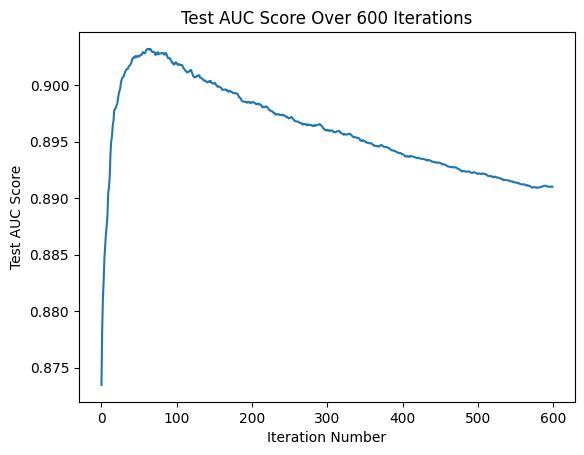

In [113]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 100 iterations. This is because this much cross-validation can actually cause the model to become overfit. So, there is a limit to how much cross-validation you should to.

In [114]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_scores),
                                              np.std(cv_scores) * 2))

[0.88823529 0.88393665 0.8821267  0.8884363 ]
Average accuracy: 0.89 (+/- 0.01)


average cv_score for this course is getting higher! With only a couple of hyperparameters and cross-validation, we can get the average accuracy up to 89%. This is a great way to validate how robust the model is.

In machine learning, having an imbalanced dataset means that the classes in the target variable are not represented equally. For example, in a binary classification problem, you might have 95% of samples belonging to Class A and only 5% belonging to Class B. This imbalance can lead to biased models, as they tend to predict the majority class more often, resulting in poor performance when predicting the minority class.

Undersampling is one technique used to handle imbalanced datasets. It works by randomly removing samples from the majority class to balance the class distribution. In the provided code, nondefaults are being undersampled to match the number of defaults, which are presumably the minority class.

While undersampling can help improve the model's performance on the minority class, it's not without its drawbacks. The main one is that it can lead to loss of information, as it removes potentially useful data. It can also introduce bias if the samples removed contain unique characteristics not present in the remaining samples.

Therefore, it's important to use undersampling judiciously and consider other techniques like oversampling (adding more samples to the minority class), SMOTE (Synthetic Minority Over-sampling Technique), or using algorithms that are less sensitive to class imbalance.

In [115]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [116]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

loan_status
0    3872
1    3872
Name: count, dtype: int64


Now, our training set has an even number of defaults and non-defaults. Let's test out some machine learning models on this new undersampled data set and compare their performance to the models trained on the regular data set.

In [117]:
#retrain the model with the undersampled data set by gb2_preds
X_train_under = X_y_train_under.drop('loan_status', axis = 1)
y_train_under = X_y_train_under['loan_status']

In [118]:
#split the data into training and testing sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_train_under, y_train_under, test_size=.4, random_state=123)

In [129]:
X_train_under.head()

,person_income,loan_int_rate,loan_percent_income,loan_amnt,person_home_ownership_MORTGAGE,loan_grade_F
1705,92000,16.77,0.27,25000,False,False
689,71700,13.80,0.13,9000,True,False
2059,43000,7.74,0.14,6000,False,False
1183,82000,10.00,0.17,14000,True,False
1912,110000,11.99,0.15,16000,True,False


In [119]:
# Create a gradient boosted tree model with two hyperparameters
gbt2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7).fit(X_train_under, np.ravel(y_train_under))

# Predict the loan_status using the model
gbt2_preds = gbt2.predict(X_test_under)

In [120]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test_under, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.96      0.93      9194
     Default       0.82      0.64      0.72      2592

    accuracy                           0.89     11786
   macro avg       0.86      0.80      0.82     11786
weighted avg       0.89      0.89      0.88     11786

              precision    recall  f1-score   support

 Non-Default       0.79      0.84      0.82      1563
     Default       0.83      0.77      0.80      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



In [121]:
# Import the roc_auc_score method
from sklearn.metrics import roc_auc_score

# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test_under, gbt2_preds))

0.7983530002793019
0.8072986676836701


Undersampling the training data results in more false positives, but the recall for defaults and the AUC score are both higher than the original model. This means overall it predicts defaults much more accurately.

In [122]:
#get the predictions for the logistic regression and gradient boosted tree

clf_gbt_preds = gbt2.predict(X_test)

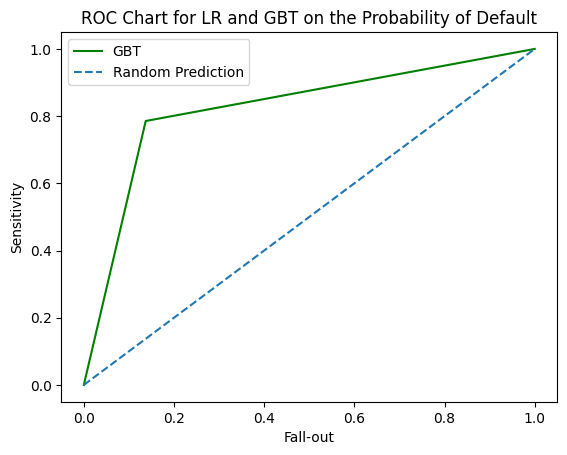

In [123]:
# ROC chart components
#import the roc_curve and auc methods
from sklearn.metrics import roc_curve, auc


fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

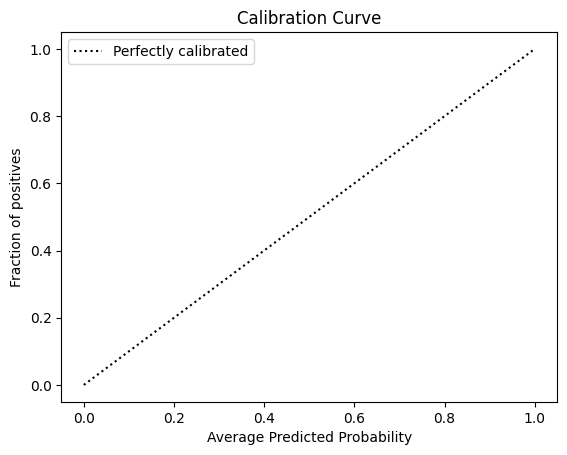

In [124]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [125]:
#get the calibration curve for the logistic regression and gradient boosted tree
from sklearn.calibration import calibration_curve
mean_pred_val_gbt, frac_of_pos_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins = 10)

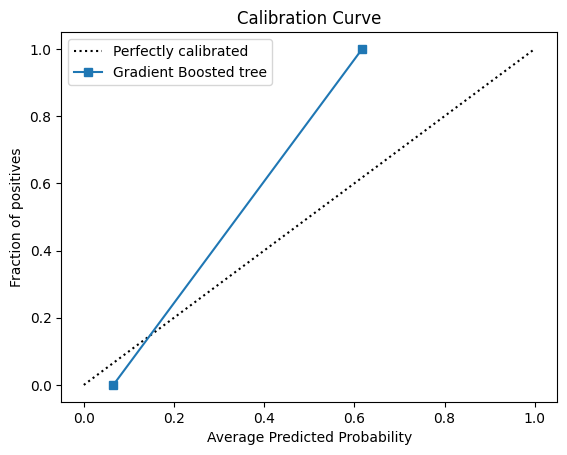

In [126]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [127]:
#save the gradient boosted tree model
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf_gbt, open(filename, 'wb'))

In [128]:
#turn this notebook into a script
!jupyter nbconvert --to script creditriskfinal.ipynb

[NbConvertApp] Converting notebook creditriskfinal.ipynb to script
[NbConvertApp] Writing 18295 bytes to creditriskfinal.py
